In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder

In [2]:
# Load your dataset
file_path = r"D:\\ML Folders\\ml_env\\GitHub\\Hero-Product-Recommendation\\Datasets\\rohit_electronics_sales.csv"
df = pd.read_csv(file_path)


In [3]:
df.sample(10)

,Transaction ID,Date,Product Category,Subcategory,Product Name,Brand Name,Unit Price,Discount (%),Discounted Price,Total Revenue,GST_Percentage,GST_Amount,Total_Revenue_Incl_GST,Current Stock,Stock_Status,Rating,Returns,Customer Type,Payment Method
421,T0422,2025-04-07 07:01:03,Laptops,Ultrabook,ASUS Ultrabook 2,ASUS,42239,22,32946.42,32946.42,18,5930.36,38876.78,32,OK,4.6,0,New,Debit Card
180,T0181,2025-04-02 22:59:23,Laptop Accessories,Bag,HP Bag 35,HP,4604,23,3545.08,3545.08,18,638.11,4183.19,52,OK,2.3,0,New,UPI
453,T0454,2025-04-08 05:28:38,Mobile Accessories,Case,Logitech Case 28,Logitech,4036,16,3390.24,3390.24,18,610.24,4000.48,51,OK,4.9,0,Returning,UPI
21,T0022,2025-03-17 02:36:39,Mobile Accessories,Charger,Zebronics Charger 30,Zebronics,4460,23,3434.20,3434.20,18,618.16,4052.36,20,OK,4.3,0,New,Cash
77,T0078,2025-04-10 18:01:08,Laptops,Gaming Laptop,Lenovo Gaming Laptop 15,Lenovo,51366,29,36469.86,36469.86,18,6564.57,43034.43,33,OK,4.1,0,Regular,Debit Card
437,T0438,2025-03-28 02:25:03,Mobile Accessories,Earbuds,Boat Earbuds 8,Boat,2663,30,1864.10,1864.10,18,335.54,2199.64,1,Low Stock,1.3,1,Wholesale,UPI
368,T0369,2025-04-11 15:56:02,Mobiles,Smartphone,Apple Smartphone 44,Apple,99947,20,79957.60,79957.60,12,9594.91,89552.51,36,OK,4.5,0,Regular,UPI
231,T0232,2025-03-19 13:35:31,Mobile Accessories,Charger,Logitech Charger 20,Logitech,808,12,711.04,711.04,18,127.99,839.03,32,OK,2.2,1,Returning,Cash
336,T0337,2025-03-22 08:18:05,Mobile Accessories,Charger,Zebronics Charger 30,Zebronics,4460,12,3924.80,3924.80,18,706.46,4631.26,12,OK,3.6,1,Regular,Credit Card
2,T0003,2025-03-31 01:19:42,Mobile Accessories,Cable,Boat Cable 36,Boat,1948,15,1655.80,1655.80,18,298.04,1953.84,17,OK,1.6,1,Returning,UPI


In [4]:
df.shape

(500, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          500 non-null    object 
 1   Date                    500 non-null    object 
 2   Product Category        500 non-null    object 
 3   Subcategory             500 non-null    object 
 4   Product Name            500 non-null    object 
 5   Brand Name              500 non-null    object 
 6   Unit Price              500 non-null    int64  
 7   Discount (%)            500 non-null    int64  
 8   Discounted Price        500 non-null    float64
 9   Total Revenue           500 non-null    float64
 10  GST_Percentage          500 non-null    int64  
 11  GST_Amount              500 non-null    float64
 12  Total_Revenue_Incl_GST  500 non-null    float64
 13  Current Stock           500 non-null    int64  
 14  Stock_Status            500 non-null    ob

In [6]:
df.isna().sum()

Transaction ID            0
Date                      0
Product Category          0
Subcategory               0
Product Name              0
Brand Name                0
Unit Price                0
Discount (%)              0
Discounted Price          0
Total Revenue             0
GST_Percentage            0
GST_Amount                0
Total_Revenue_Incl_GST    0
Current Stock             0
Stock_Status              0
Rating                    0
Returns                   0
Customer Type             0
Payment Method            0
dtype: int64

In [7]:
def check_null_unique(df):
    null_data = []
    nunique_vals = 0
    null_per = 0
    unique_vals = []
    for i in df.columns:
        null_val = df[i].isna().sum()
        null_per = (np.round(((null_val)/len(df)),3))*100
        nunique_vals = int(df[i].nunique())
        unique_vals = list(df[i].unique())
        null_data.append([i,null_per,nunique_vals,unique_vals])


    return pd.DataFrame(null_data, columns=['Column', 'Null_Percentage','nunique','unique_vals']) if null_data else pd.DataFrame(columns=['Column', 'Null_Percentage','nunique','unique_vals'])

In [8]:
check_null_unique(df)

,Column,Null_Percentage,nunique,unique_vals
0,Transaction ID,0.0,500,"[T0001, T0002, T0003, T0004, T0005, T0006, T00..."
1,Date,0.0,500,"[2025-03-24 14:50:24, 2025-03-16 00:28:22, 202..."
2,Product Category,0.0,4,"[Mobile Accessories, Mobiles, Laptops, Laptop ..."
3,Subcategory,0.0,12,"[Case, Cable, Smartphone, Ultrabook, Gaming La..."
4,Product Name,0.0,50,"[Logitech Case 28, Realme Case 45, Boat Cable ..."
5,Brand Name,0.0,17,"[Logitech, Realme, Boat, Mi, ASUS, Apple, Leno..."
6,Unit Price,0.0,50,"[4036, 520, 1948, 50566, 42239, 4909, 99947, 8..."
7,Discount (%),0.0,31,"[27, 4, 15, 3, 6, 19, 25, 9, 21, 16, 10, 7, 20..."
8,Discounted Price,0.0,429,"[2946.28, 499.2, 1655.8, 49049.02, 39704.66, 3..."
9,Total Revenue,0.0,429,"[2946.28, 499.2, 1655.8, 49049.02, 39704.66, 3..."


In [9]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Date-based columns
df['Month'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayName'] = df['Date'].dt.day_name()

# Assumption: Profit = Discounted Price - (some estimated Cost Price)
# For now, assume Cost Price = 85% of Unit Price
df['Estimated_Cost'] = df['Unit Price'] * 0.85
df['Profit_Per_Unit'] = df['Discounted Price'] - df['Estimated_Cost']

# Total Profit per transaction
df['Total_Profit'] = df['Profit_Per_Unit'] * (df['Total Revenue'] / df['Discounted Price'])

# Return Flag (1 = returned, 0 = not returned)
df['Return_Flag'] = df['Returns'].apply(lambda x: 1 if x > 0 else 0)


In [10]:
# Group by Product Name + Brand Name
grouped = df.groupby(['Product Name', 'Brand Name']).agg({
    'Discounted Price': 'count',  # proxy for units sold
    'Total Revenue': 'sum',
    'Total_Profit': 'sum',
    'Rating': 'mean',
    'Return_Flag': 'mean'  # average return rate
}).reset_index()

# Rename columns
grouped.rename(columns={
    'Discounted Price': 'Units_Sold',
    'Rating': 'Avg_Rating',
    'Return_Flag': 'Return_Rate'
}, inplace=True)

# Normalize values between 0 and 1 for scoring
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
score_data = scaler.fit_transform(grouped[['Total Revenue', 'Total_Profit', 'Units_Sold', 'Avg_Rating', 'Return_Rate']])
grouped[['Rev_Score', 'Profit_Score', 'Sales_Score', 'Rating_Score', 'Return_Score']] = score_data

# Hero Score formula (can be customized)
grouped['Hero_Score'] = (
    0.40 * grouped['Rev_Score'] +
    0.25 * grouped['Profit_Score'] +
    0.15 * grouped['Sales_Score'] +
    0.10 * grouped['Rating_Score'] -
    0.10 * grouped['Return_Score']
)

# Sort and show top 3 hero products
top_hero_products = grouped.sort_values(by='Hero_Score', ascending=False).head(3)
print("🏆 Top 3 Hero Products of the Month:")
print(top_hero_products[['Product Name', 'Brand Name', 'Units_Sold', 'Total Revenue', 'Total_Profit', 'Avg_Rating', 'Return_Rate', 'Hero_Score']])


🏆 Top 3 Hero Products of the Month:
            Product Name Brand Name  Units_Sold  Total Revenue  Total_Profit  \
17     Dell Ultrabook 39       Dell          13     1820240.85      63589.20   
34       MSI Notebook 43        MSI          13     1899420.12     -69490.98   
0   ASUS Gaming Laptop 3       ASUS          10     1489147.36      -3512.14   

    Avg_Rating  Return_Rate  Hero_Score  
17    2.953846     0.000000    0.776538  
34    3.307692     0.076923    0.554810  
0     3.210000     0.200000    0.535737  


# Visulizations

### Top 10 Best-Selling Products (Bar Chart)


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17344\1678056711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units_Sold', y='Product Name', data=top_selling, palette='viridis')


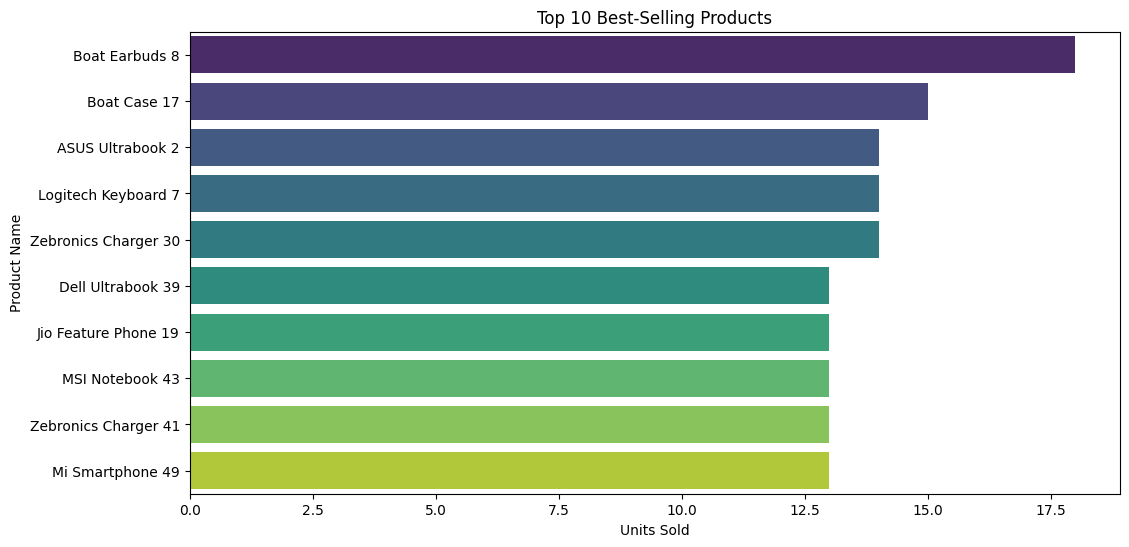

In [11]:
top_selling = grouped.sort_values(by='Units_Sold', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Units_Sold', y='Product Name', data=top_selling, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.show()

###  Revenue per Brand/Product (Bar Chart)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17344\2880567767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Product Name', data=grouped.sort_values(by='Total Revenue', ascending=False).head(10), palette='Blues')


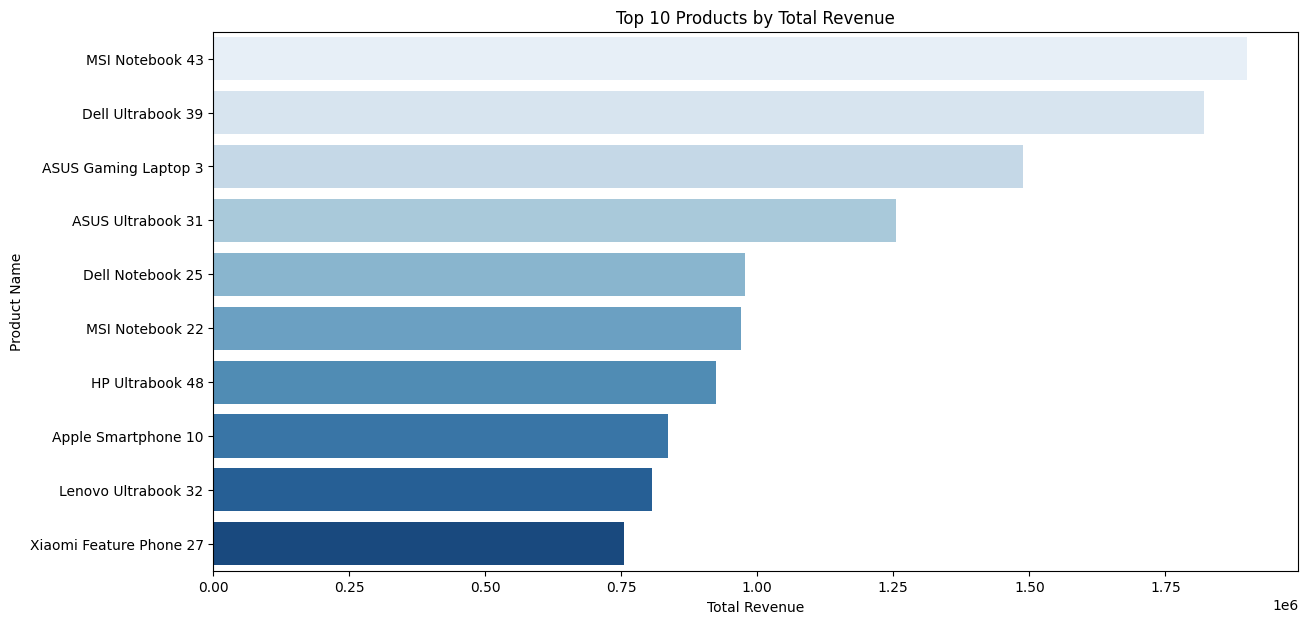

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17344\2880567767.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Brand Name', data=grouped.groupby('Brand Name').agg({


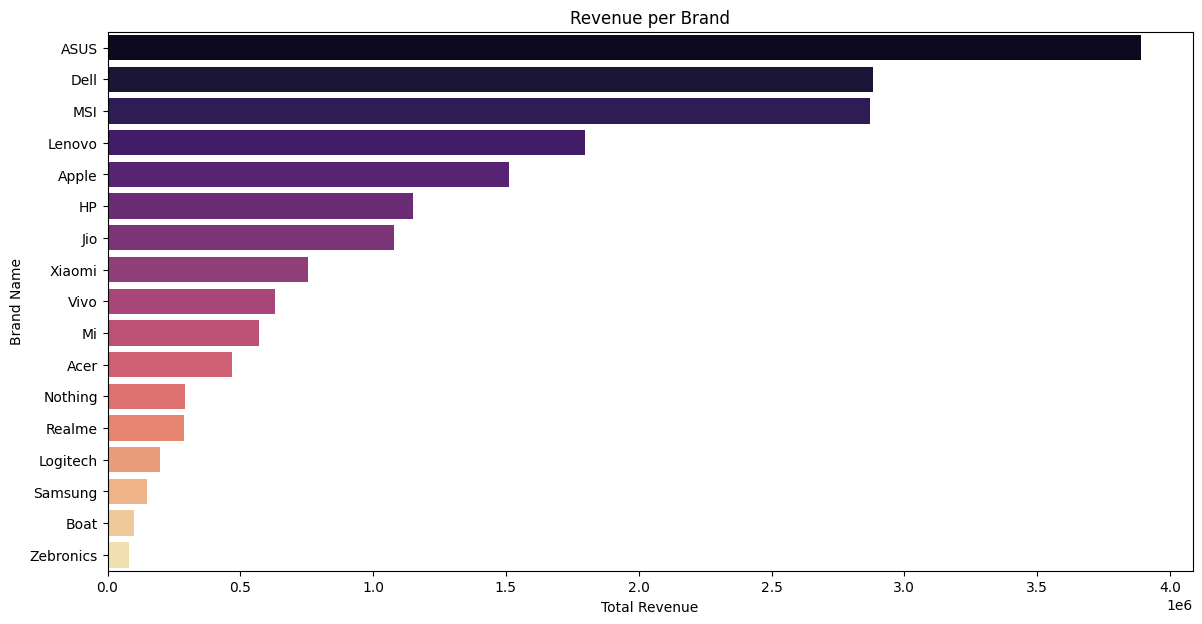

In [12]:
# Total Revenue per Product
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Revenue', y='Product Name', data=grouped.sort_values(by='Total Revenue', ascending=False).head(10), palette='Blues')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

# Total Revenue per Brand
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Revenue', y='Brand Name', data=grouped.groupby('Brand Name').agg({
    'Total Revenue': 'sum'
}).reset_index().sort_values(by='Total Revenue', ascending=False), palette='magma')
plt.title('Revenue per Brand')
plt.xlabel('Total Revenue')
plt.ylabel('Brand Name')
plt.show()


### Stock Status Distribution (Pie Chart)

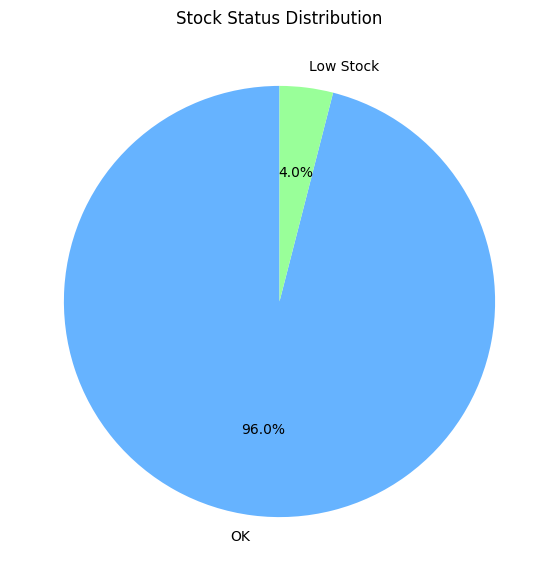

In [13]:
# Stock Status Distribution
# Check if 'Stock_Status' is in the original DataFrame (df)
if 'Stock_Status' in df.columns:
    # If it is, include it in the groupby aggregation
    grouped = df.groupby(['Product Name', 'Brand Name']).agg({
        # ... (other aggregations) ...,
        'Stock_Status': lambda x: x.mode()[0]  # Get the most frequent Stock_Status
    }).reset_index()

    stock_status = grouped['Stock_Status'].value_counts()

    plt.figure(figsize=(7, 7))
    stock_status.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff6666'], startangle=90)
    plt.title('Stock Status Distribution')
    plt.ylabel('')
    plt.show()
else:
    print("Column 'Stock_Status' not found in the DataFrame.")

###  Monthly Sales Trend (Line Plot)


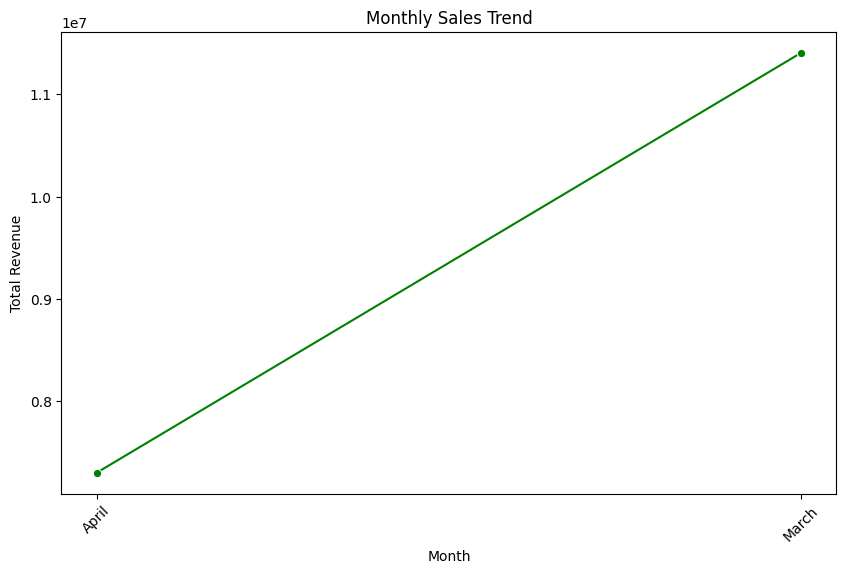

In [14]:
# Sales Trend per Month
monthly_sales = df.groupby(df['Month']).agg({
    'Total Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total Revenue', data=monthly_sales, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


### Customer Type vs Revenue/Count (Bar Chart)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17344\3733102119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Total Revenue', data=customer_revenue, palette='Set2')


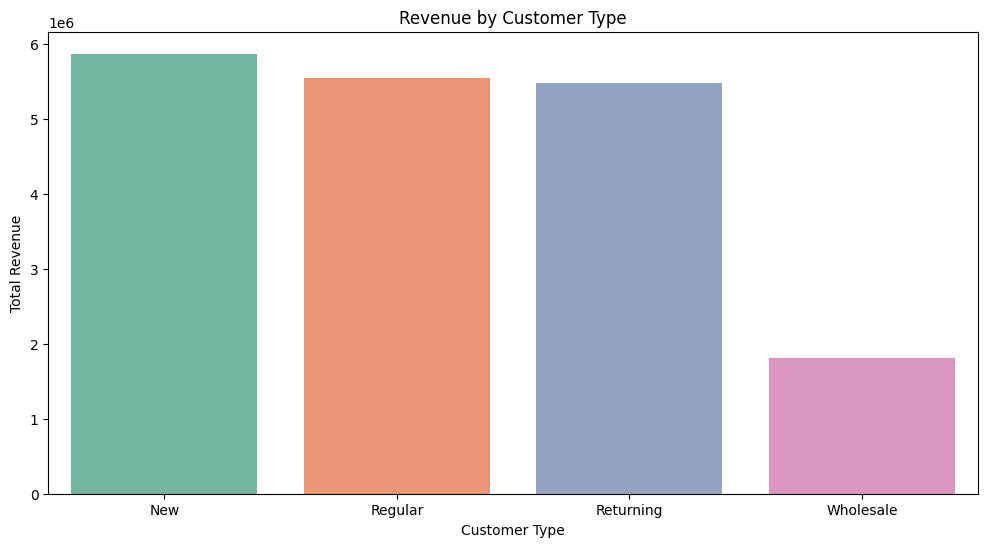

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17344\3733102119.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Discounted Price', data=customer_revenue, palette='Set2')


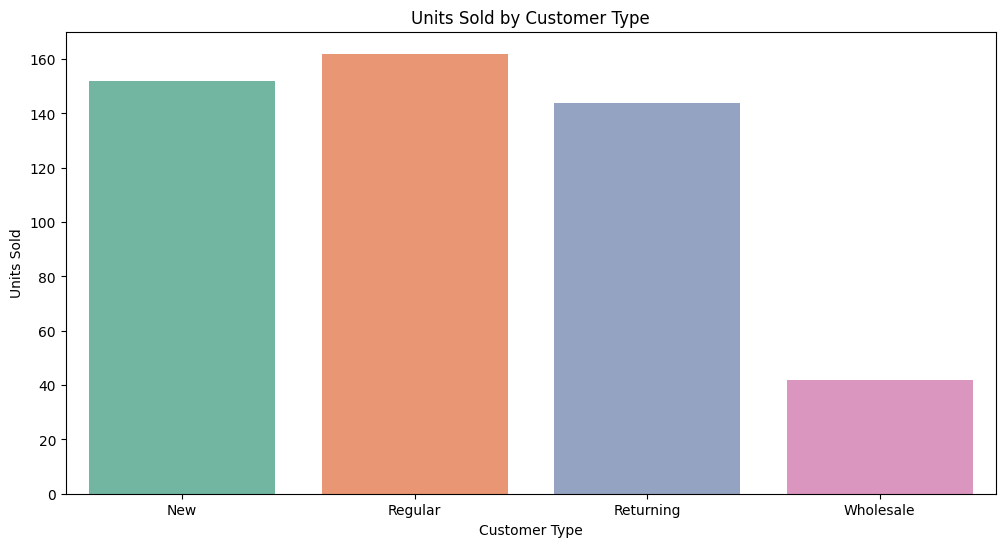

In [15]:
# Revenue and Units Sold by Customer Type
customer_revenue = df.groupby('Customer Type').agg({
    'Total Revenue': 'sum',
    'Discounted Price': 'count'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Total Revenue', data=customer_revenue, palette='Set2')
plt.title('Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Discounted Price', data=customer_revenue, palette='Set2')
plt.title('Units Sold by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Units Sold')
plt.show()


### Payment Method Distribution (Pie Chart)


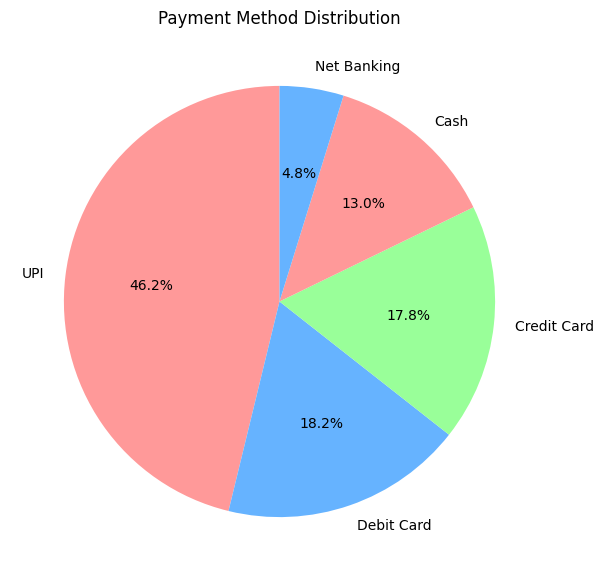

In [16]:
# Payment Method Distribution
payment_method = df['Payment Method'].value_counts()

plt.figure(figsize=(7, 7))
payment_method.plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'], startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()
